<a href="https://colab.research.google.com/github/marzier/CSC481/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

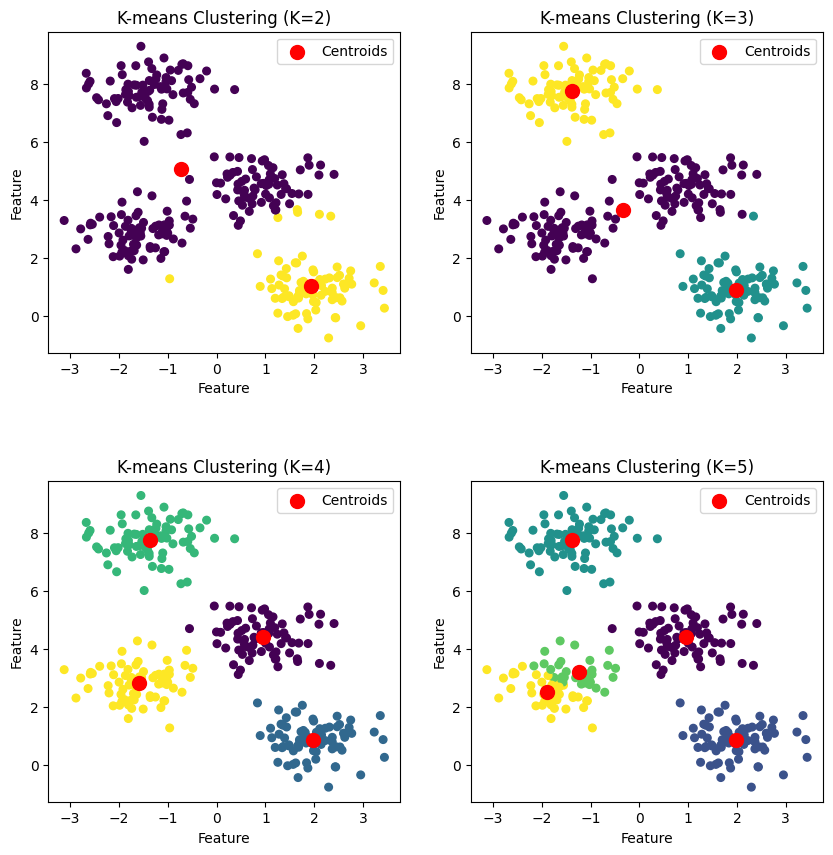

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate a fixed dataset with 300 samples and 4 centers
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# List of K values to test
k_values = [2, 3, 4, 5]
mse_values = []

# Plotting the K-means clustering for each K value
plt.figure(figsize=(10, 10))
for i, k in enumerate(k_values, 1):
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_kmeans = kmeans.fit_predict(X)

    # Calculate MSE (Mean Squared Error) for the current clustering
    mse = np.mean([np.min(np.sum((X - center) ** 2, axis=1)) for center in kmeans.cluster_centers_])
    mse_values.append(mse)

    plt.subplots_adjust(hspace=0.4)  # Increase this value to add more vertical space

    # Create subplot for each K value
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
    plt.title(f'K-means Clustering (K={k})')
    plt.xlabel('Feature')
    plt.ylabel('Feature')
    plt.legend()

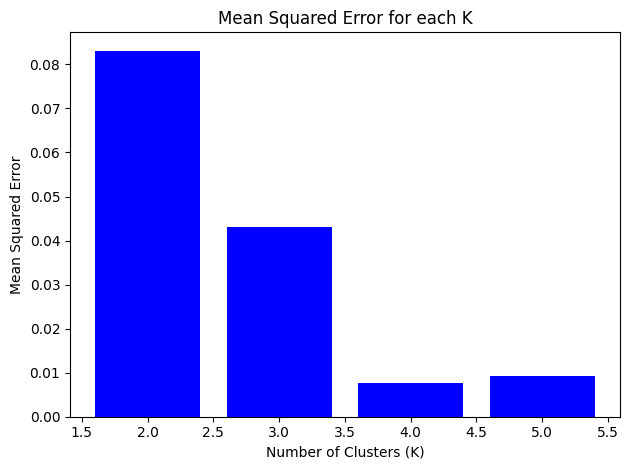

In [4]:
# Plotting the MSE values in a bar chart
plt.plot(figsize=(20, 6))
plt.bar(k_values, mse_values, color='blue')
plt.title('Mean Squared Error for each K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()